## Can A.I. save Jack from the Titanic?

**Want to read the frienly article based on this code** (with pictures!):
https://github.com/antoinedme/titanic-dataset-ml


Author: *Antoine de Marassé* https://www.linkedin.com/in/hiantoine/

Based on: Microsoft Azure (data science masterclass), Kaggle, Pandas, Sci-kit Learn and Seaborn

Hi there, welcome on this fun Machine Learning introduction example. In this Python Notebook I play around with the RMS Titanic passenger's dataset and apply a bit of this so called "Artificial Intelligence". The different sections are:
- [Exploring the Passengers dataset entries](#Exploring-the-Passengers-dataset-entries)
- [Checking and preparing the data](#Checking-and-preparing-the-data)
- [Visual analysis with Seaborn](#Visual-Analysis-with-Seaborn)
- [Split the dataset (training and testing)](#Split-the-training-and-test-data)
- [Apply logistic regression](#Applying-Logistic-Regression)
- [Evaluate the model](#Evaluate-the-model)
- [Apply decision tree](#One-more-turn-applying-Decision-Tree)

## Exploring the Passengers dataset entries

RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of April 15, 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. 
    
After leaving Southampton on 10 April 1912, Titanic called at Cherbourg in France and Queenstown (now Cobh) in Ireland, before heading west to New York. On 14 April, four days into the crossing and about 375 miles (600 km) south of Newfoundland, she hit an iceberg at 11:40 p.m. ship's time. The collision caused the hull plates to buckle inwards along her starboard (right) side and opened five of her sixteen watertight compartments to the sea; she could only survive four flooding. Meanwhile, passengers and some crew members were evacuated in lifeboats, many of which were launched only partially loaded. A disproportionate number of men were left aboard because of a "women and children first" protocol for loading lifeboats. At 2:20 a.m., she broke apart and foundered with well over one thousand people still aboard. Just under two hours after Titanic sank, the Cunard liner RMS Carpathia arrived and brought aboard an estimated 705 survivors. 

Install pandas package ```conda install pandas```

In [2]:
# Import classic pandas and numpy libraries
import pandas as pd
import numpy as np

In [3]:
# Load the dataset file into "titanic" object
titanic = pd.read_csv("data/titanic-1309-rows-biostatvanderbilt.csv")
# Let's have a look at the dataset attributes
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# Let's check the dataset info, variables types and null counts 
# (pclass, survived, name, sex, sibsp, parch, ticket are complete)
# (embarked miss one value, age is incomplete for 263 passengers)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [5]:
# Let's get few statistical data from the dataset (and mostly the mean of survivers: 38,19%)
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
titanic.groupby('survived').mean()

,pclass,age,sibsp,parch,fare,body
survived,,,,,,
0,2.500618,30.545363,0.521632,0.328801,23.353831,160.809917
1,1.962000,28.918244,0.462000,0.476000,49.361184,NaN


The dataset has 1309 entries. 
This dataset describes the survival status of individual passengers on the Titanic. The dataset has 10 variables:
- `survived`: 0 = No, 1 = Yes. **(As we can see on the table above `survived` mean, 38,19% of passengers survived)**
- `pclass`: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- Demographics: `Sex`, `Age`
- `sibsp`, `parch`: Number of siblings or spouses aboard, number of parents or children aboard
- `ticket`: Passenger ticket number
- `fare`: Passenger fare
- `cabin`: Cabin number
- `embarked`: Port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

## Checking and preparing the data

Dropping few columns and checking data values

In [7]:
# Removing some variables that might be not used (to be checked later) and anonymizing the data
titanic.drop(['name','body','boat','cabin','ticket','embarked','home.dest'],axis=1,inplace=True)

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1046 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1308 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 71.7+ KB


In [9]:
titanic['age'].isnull().value_counts()

False    1046
True      263
Name: age, dtype: int64

In [10]:
#titanic.groupby('sex')['age'].median()
titanic.groupby('sex').count()

,pclass,survived,age,sibsp,parch,fare
sex,,,,,,
female,466,466,388,466,466,466
male,843,843,658,843,843,842


In [11]:
titanic['age'] = titanic.groupby('sex')['age'].apply(lambda x: x.fillna(x.median()))

In [12]:
titanic.groupby('pclass')['fare'].median()

pclass
1    60.0000
2    15.0458
3     8.0500
Name: fare, dtype: float64

In [13]:
titanic['fare'] = titanic.groupby('pclass')['fare'].apply(lambda x: x.fillna(x.median()))

In [14]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 71.7+ KB


In [15]:
# Saving this table for later
iceberg = titanic
iceberg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   sibsp     1309 non-null   int64  
 5   parch     1309 non-null   int64  
 6   fare      1309 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 71.7+ KB


In [16]:
# adding on id column (to replace name)
# titanic.insert(0, 'id', range(1, 1 + len(titanic)))

## Visual Analysis with Seaborn

Install Seaborn, statistical data visualization library based on matplotlib: ```conda install seaborn```

In [17]:
# Duplicating the object for some cleaning and analysis
exploratory = titanic
exploratory.drop('sibsp',axis=1,inplace=True)

In [18]:
exploratory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   age       1309 non-null   float64
 4   parch     1309 non-null   int64  
 5   fare      1309 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.5+ KB


In [19]:
# Converting the sex variable into integer
exploratory['ismale'] = exploratory['sex'].replace(regex='female', value=0)
exploratory['sex_is_male'] = exploratory['ismale'].replace(regex='male', value=1)
exploratory.drop(['sex','ismale'],axis=1,inplace=True)

# re-order the columns
exploratory = exploratory[['sex_is_male','age','parch','fare','pclass','survived']]

exploratory.head()

,sex_is_male,age,parch,fare,pclass,survived
0,0,29.00,0,211.3375,1,1
1,1,0.92,2,151.5500,1,1
2,0,2.00,2,151.5500,1,0
3,1,30.00,2,151.5500,1,0
4,0,25.00,2,151.5500,1,0


In [20]:
exploratory.groupby(['sex_is_male','pclass'])['survived'].mean()

sex_is_male  pclass
0            1         0.965278
             2         0.886792
             3         0.490741
1            1         0.340782
             2         0.146199
             3         0.152130
Name: survived, dtype: float64

In [21]:
exploratory.groupby(['pclass'])['fare'].mean()

pclass
1    87.508992
2    21.179196
3    13.295480
Name: fare, dtype: float64

Survival probability: for women on 1st class is: 96,5% compared to men only 34,1%
When we look at the 3rd class, the probability drops to 49,1% for women and 15,2% for men. We might want to plot those stats.

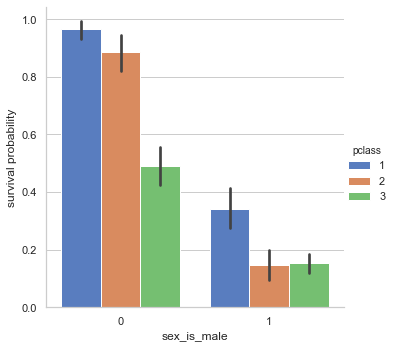

In [22]:
# Use Seaborn to visualize survived male and female per class in grouped barplots
import seaborn as sns
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
#g = sns.catplot(x="pclass", y="survived", hue="sex", data=titanic, height=5, kind="bar", palette="muted")
graph = sns.catplot(x="sex_is_male", y="survived", hue="pclass", kind="bar", palette="muted", data=exploratory)
graph.set_ylabels("survival probability")

In [23]:
exploratory.corr()

,sex_is_male,age,parch,fare,pclass,survived
sex_is_male,1.000000,0.059834,-0.213125,-0.185744,0.124617,-0.528693
age,0.059834,1.000000,-0.126307,0.178494,-0.379761,-0.045882
parch,-0.213125,-0.126307,1.000000,0.221668,0.018322,0.082660
fare,-0.185744,0.178494,0.221668,1.000000,-0.558740,0.244479
pclass,0.124617,-0.379761,0.018322,-0.558740,1.000000,-0.312469
survived,-0.528693,-0.045882,0.082660,0.244479,-0.312469,1.000000


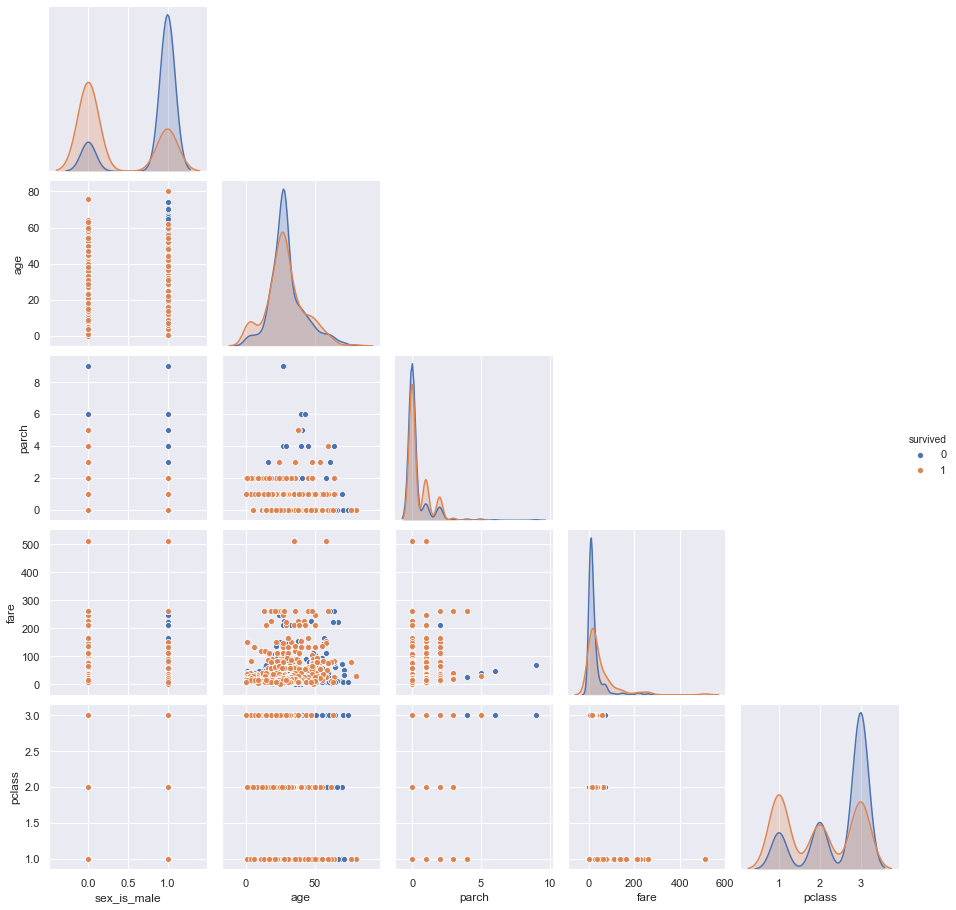

In [24]:
# Draw scatterplots for joint relationships and histograms for univariate distributions:
# different levels of a categorical variable by the color of plot elements
sns.set(style="darkgrid")  
sns.pairplot(exploratory, dropna=True, hue="survived", corner=True)
#sns.pairplot(exploratory, dropna=True, hue="survived", corner=True, kind="reg")

## Split the training and test data

Install the scikit-learn - Machine Learning in Python: ```conda install -c intel scikit-learn```
- Simple and efficient tools for predictive data analysis
- Built on NumPy, SciPy, and matplotlib
Link: https://scikit-learn.org/stable/
 
#### Predicting a continuous-valued attribute associated with an object.
For this part, I will first start to I will apply the linear regression model used on the scikit-learn `diabetes` dataset, in order to illustrate a two-dimensional plot of this regression technique.
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

The straight line can be seen in the plot, showing how linear regression attempts to draw a straight line that will best minimize the residual sum of squares between the observed responses in the dataset, and the responses predicted by the linear approximation. The coefficients, the residual sum of squares and the coefficient of determination are also calculated.

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
%matplotlib inline

In [27]:
# One step i missed earlier: dropping the null values (NaN from 'age' column)
iceberg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       1309 non-null   int64  
 1   survived     1309 non-null   int64  
 2   age          1309 non-null   float64
 3   parch        1309 non-null   int64  
 4   fare         1309 non-null   float64
 5   sex_is_male  1309 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 61.5 KB


In [28]:
# Splitting the table into all parameters list X and the value we want as y 'survived'
X = iceberg.drop(['survived'],axis=1)
y = iceberg['survived']

X.info()
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       1309 non-null   int64  
 1   age          1309 non-null   float64
 2   parch        1309 non-null   int64  
 3   fare         1309 non-null   float64
 4   sex_is_male  1309 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 51.3 KB


0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64

In [29]:
# Split the data into training/testing sets
# Using train_test_split function
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=67)

We chose a test size of 30% of total 1309 entries thus it cutted our set of training/testing to 916/393
<img style="padding-left:10px; width: 250px" src="https://miro.medium.com/max/2272/1*-8_kogvwmL1H6ooN1A1tsQ.png"> 

In [30]:
print('Lets have a look at the training dataset: ')
print('Size of parameters table followed by info: ', X_train.shape)
X_train.info()
print('Size of survival rate followed by info: ', y_train.shape)
y_train

Lets have a look at the training dataset: 
Size of parameters table followed by info:  (916, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 527 to 835
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       916 non-null    int64  
 1   age          916 non-null    float64
 2   parch        916 non-null    int64  
 3   fare         916 non-null    float64
 4   sex_is_male  916 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 42.9 KB
Size of survival rate followed by info:  (916,)


527     0
1280    0
170     1
491     0
587     1
       ..
905     1
985     1
7       0
821     0
835     0
Name: survived, Length: 916, dtype: int64

In [31]:
print('-----------------------------------------------------')
print('Lets have a look at the testing dataset: ')
print('Size of parameters table followed by info: ', X_test.shape)
X_test.info()
print('Size of survival rate followed by info: ', y_test.shape)
y_test

-----------------------------------------------------
Lets have a look at the testing dataset: 
Size of parameters table followed by info:  (393, 5)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 920 to 165
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       393 non-null    int64  
 1   age          393 non-null    float64
 2   parch        393 non-null    int64  
 3   fare         393 non-null    float64
 4   sex_is_male  393 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 18.4 KB
Size of survival rate followed by info:  (393,)


920     0
540     1
1207    0
1098    0
951     0
       ..
390     0
1139    0
1000    1
549     1
165     1
Name: survived, Length: 393, dtype: int64

## Applying Logistic Regression

In [32]:
from sklearn import linear_model

In [33]:
# Create linear regression object: LinearRegression fits a linear model with coefficients 
# w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, 
# and the targets predicted by the linear approximation.

# https://scikit-learn.org/stable/modules/linear_model.html

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [34]:
# Fit linear model with fit(self, X, y[, sample_weight])
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
# Predict using the linear model with predict(self, X), output is numpy array
predictions = lr.predict(X_test)

In [36]:
predictions

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,

## Evaluate the model

In contrast to linear regression, logistic regression does not produce an $R^2$ score by which we can assess the accuracy of our model. In order to evaluate that, we will use a classification report, a confusion matrix, and the accuracy score.

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
import matplotlib.pyplot as plt

In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       235
           1       0.71      0.67      0.69       158

    accuracy                           0.76       393
   macro avg       0.75      0.74      0.75       393
weighted avg       0.76      0.76      0.76       393



In [40]:
print(confusion_matrix(y_test,predictions))

[[192  43]
 [ 52 106]]


In [41]:
pd.DataFrame(confusion_matrix(y_test, predictions), 
             columns=['true survived', 'true not survived'], 
             index=['predicted survived', 'predicted not survived'])

,true survived,true not survived
predicted survived,192,43
predicted not survived,52,106


In [42]:
print(accuracy_score(y_test,predictions))

0.7582697201017812


In [43]:
X_test

,pclass,age,parch,fare,sex_is_male
920,3,28.0,0,7.7500,1
540,2,2.0,1,26.0000,0
1207,3,10.0,2,27.9000,1
1098,3,3.0,1,21.0750,0
951,3,29.0,0,7.7750,1
...,...,...,...,...,...
390,2,17.0,0,73.5000,1
1139,3,38.0,0,7.8958,1
1000,3,28.0,0,7.7500,1
549,2,3.0,1,18.7500,1


In [44]:
# Creating Jack and Rose from the movie
jack = [3, 27, 0, 8,  1]
rose = [1, 22, 1, 60, 0]
people = pd.DataFrame(np.array([jack, rose]), columns=['pclass', 'age', 'parch', 'fare','sex_is_male'])
people

,pclass,age,parch,fare,sex_is_male
0,3,27,0,8,1
1,1,22,1,60,0


In [45]:
# Predict survival of Jack and Rose
will_they_live = lr.predict(people)

In [46]:
will_they_live

array([0, 1])

In [47]:
if will_they_live[0] == 0 : 
    print("Jack just died again.")
else: 
    print("Awesome, Jack did swim and survived!")             

Jack just died again.


In [48]:
if will_they_live[1] == 0 :
    print("Omg Rose did drown too.")
else :
    print("No worries, Rose still alive and well!")

No worries, Rose still alive and well!


## One more turn applying Decision Tree

In [49]:
from sklearn import tree

In [50]:
tr = tree.DecisionTreeClassifier()

In [51]:
tr.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [52]:
tr_predictions = tr.predict(X_test)

In [53]:
print(accuracy_score(y_test,tr_predictions))

0.7150127226463104


In [54]:
import graphviz 

dot_data = tree.export_graphviz(tr, out_file=None) 
graph = graphviz.Source(dot_data) 


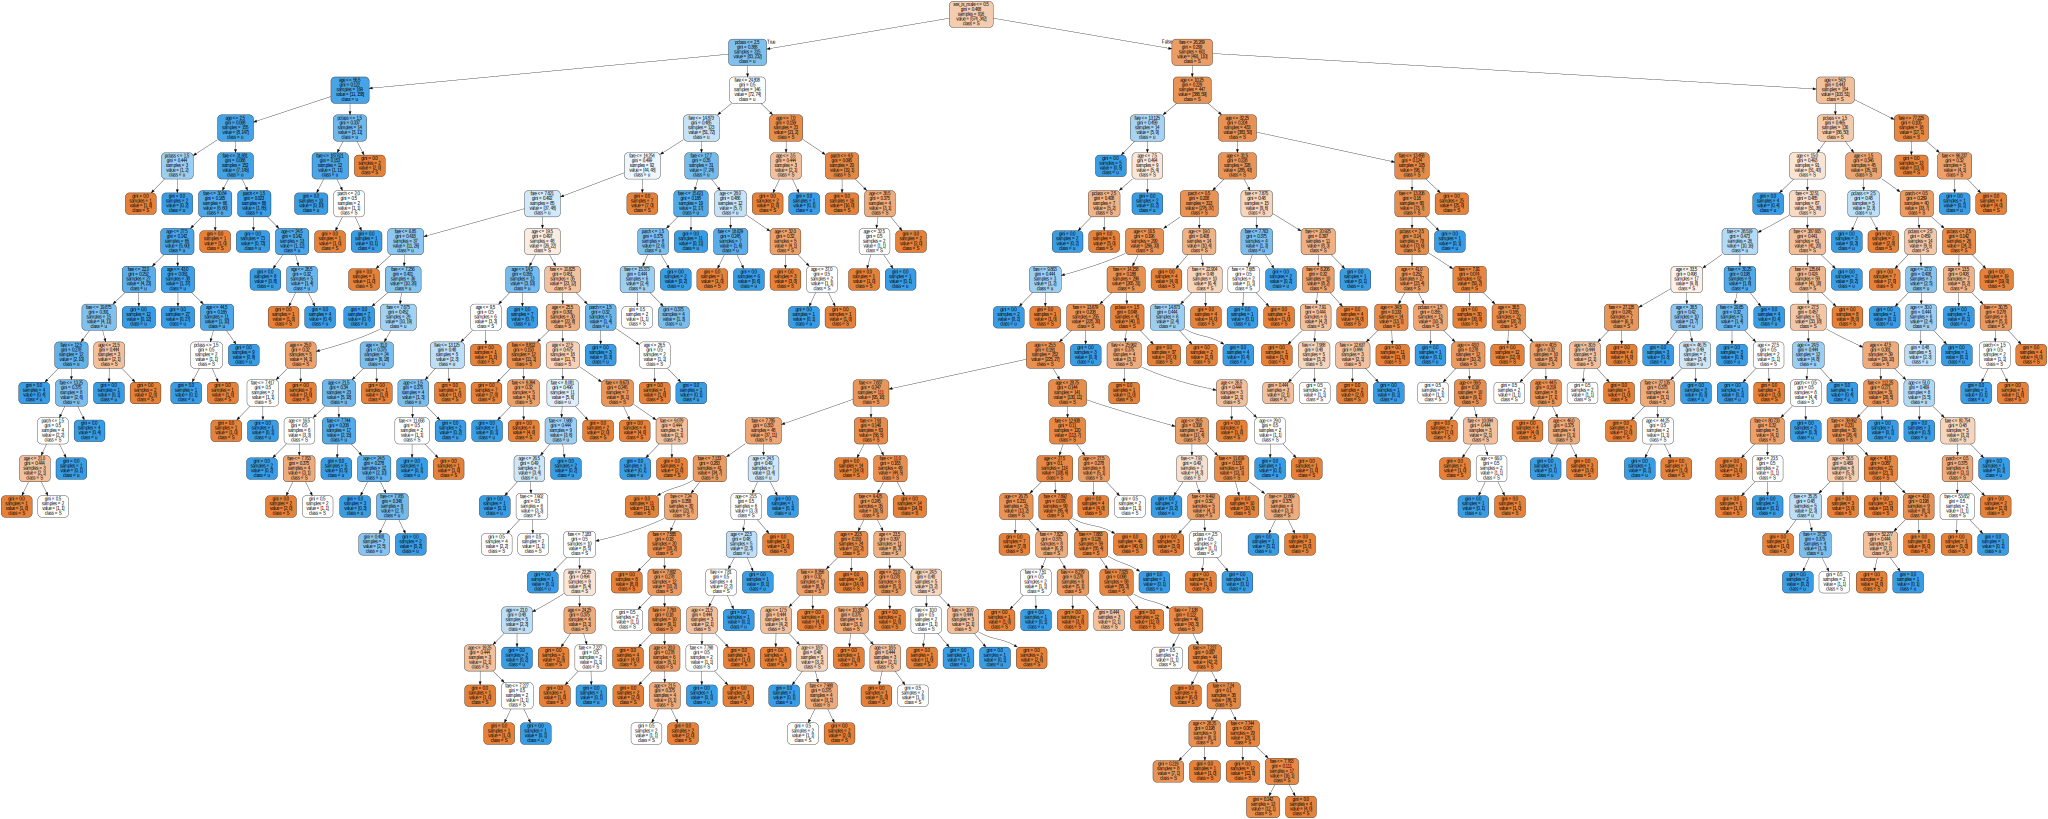

In [66]:

graph

# from IPython.display import Image  
#Image(graph.create_png())

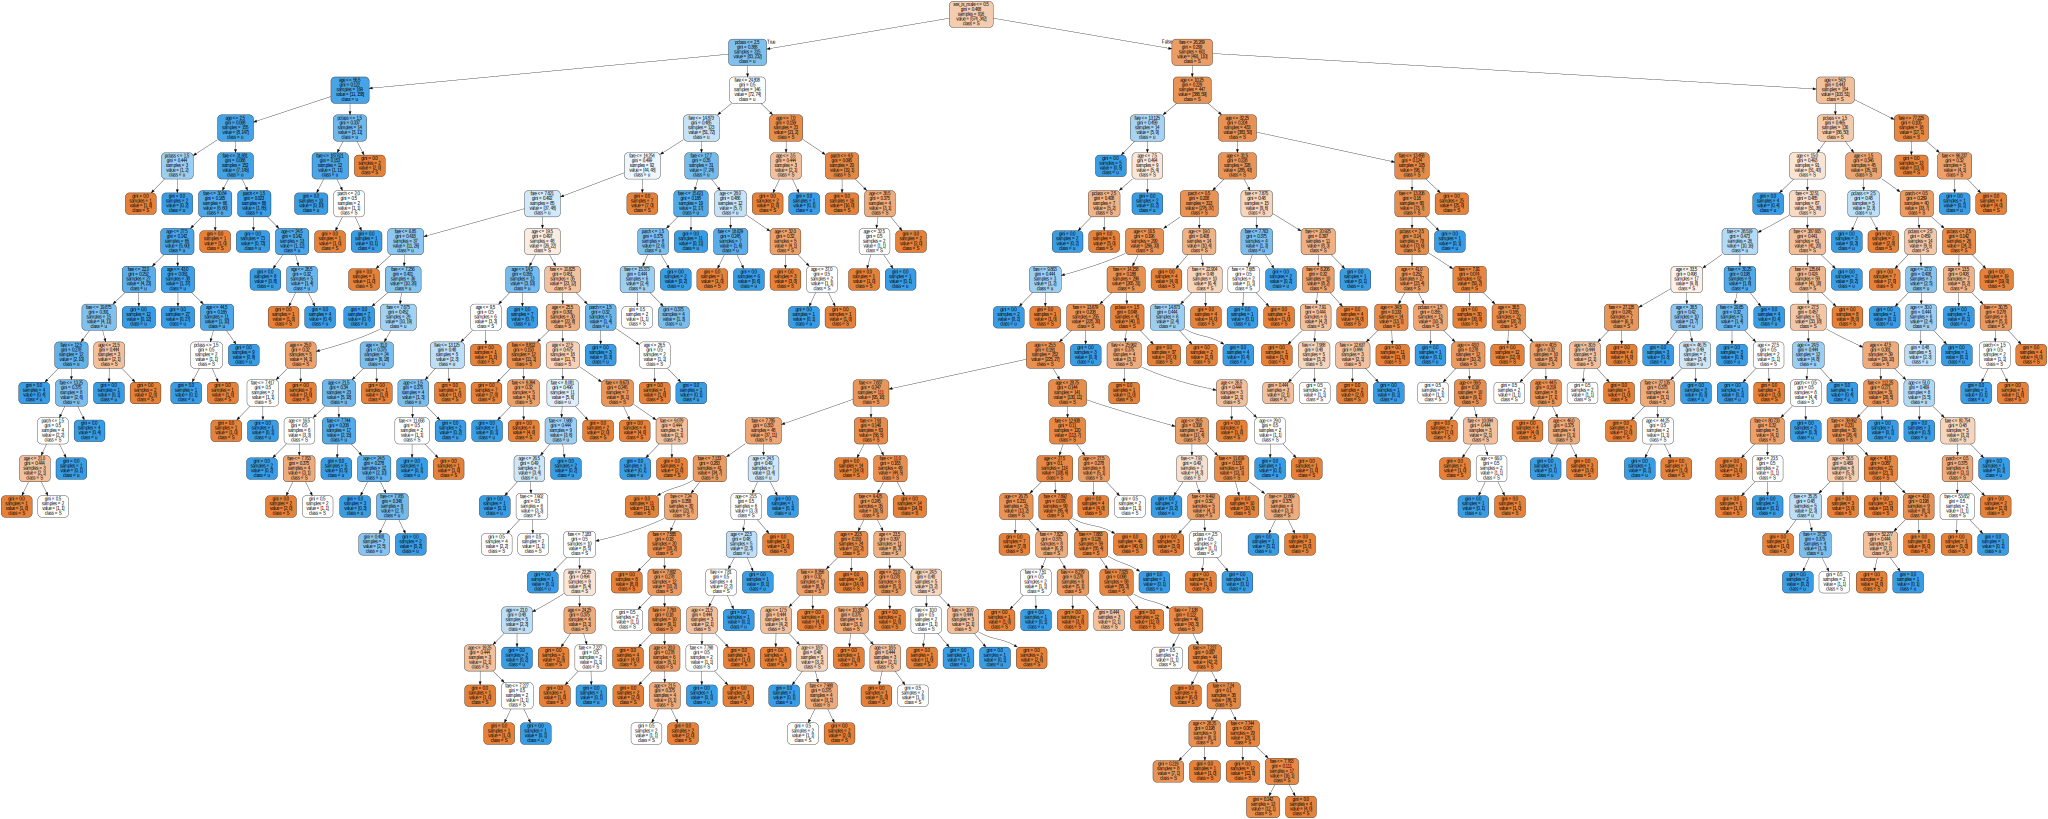

In [56]:
# tree.plot_tree(clf.fit(iris.data, iris.target)) 



dot_file = tree.export_graphviz(tr, out_file=None, 
                                feature_names=X.columns, 
                                class_names='Survived',  
                                filled=True,rounded=True)  
graph = graphviz.Source(dot_file)  
graph


In [55]:
tr_predictions

array([0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,

In [59]:
from sklearn.tree.export import export_text

print(export_text(tr))

|--- feature_4 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_1 <= 56.50
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  1.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.50
|   |   |   |   |--- feature_3 <= 31.68
|   |   |   |   |   |--- feature_3 <= 30.84
|   |   |   |   |   |   |--- feature_1 <= 27.50
|   |   |   |   |   |   |   |--- feature_3 <= 22.00
|   |   |   |   |   |   |   |   |--- feature_3 <= 19.88
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 12.50
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_3 >  12.50
|   |   |   |   |   |   |   |   |   |   |--- feature_3 <= 13.25
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_3 >  13.25
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |

In [ ]:
will_they_live_tr = lr.predict(people)
will_they_live_tr

In [ ]:
if will_they_live[0] == 0 : 
    print("Jack just died again.")
else: 
    print("Awesome, Jack did swim and survived!")             

In [ ]:
if will_they_live[1] == 0 :
    print("Omg Rose did drown too.")
else :
    print("No worries, Rose still alive and well!")




## Thank you very much!
<img align="left" style="padding-right:10px; width: 500px" src="https://www.telegraph.co.uk/content/dam/films/2016/10/28/112131568titanic-xlarge_trans_NvBQzQNjv4BqLW53-k6pAFzWQgBtbADRgM3dx78wskB5htr7NBUdSV4.jpg"> 